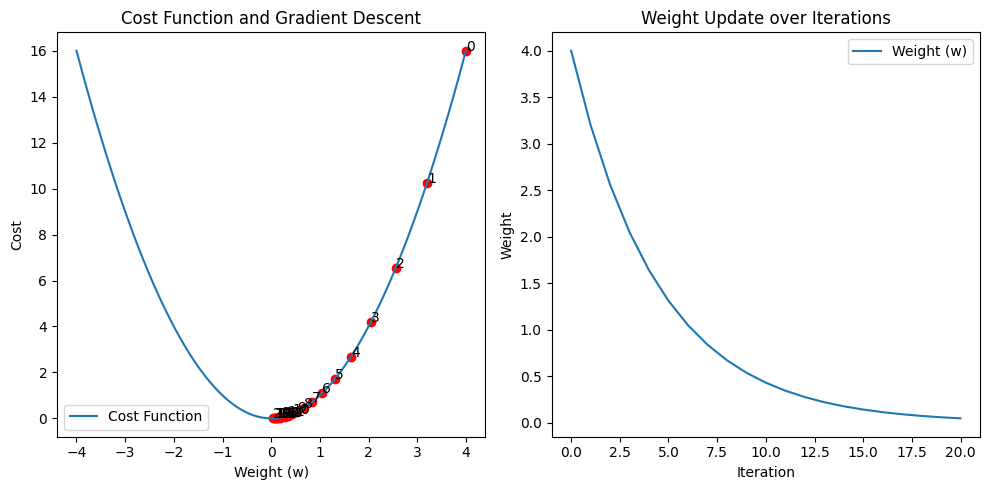

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 비용 함수와 그 기울기 정의
def cost_function(w):
    return w ** 2

def gradient(w):
    return 2 * w

# 초기 가중치 설정
w = 4
learning_rate = 0.1
iterations = 20

# 가중치 업데이트 기록을 저장할 리스트
weights = [w]
costs = [cost_function(w)]

# 경사하강법 수행
for _ in range(iterations):
    grad = gradient(w)
    w = w - learning_rate * grad
    weights.append(w)
    costs.append(cost_function(w))

# 시각화
plt.figure(figsize=(10, 5))

# 비용 함수 시각화
plt.subplot(1, 2, 1)
w_values = np.linspace(-4, 4, 100)
cost_values = cost_function(w_values)
plt.plot(w_values, cost_values, label='Cost Function')
plt.scatter(weights, costs, color='red')
for i in range(len(weights)):
    plt.annotate(f'{i}', (weights[i], costs[i]))
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.title('Cost Function and Gradient Descent')
plt.legend()

# 가중치 업데이트 시각화
plt.subplot(1, 2, 2)
plt.plot(weights, label='Weight (w)')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weight Update over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


비용 함수와 경사하강법
- 좌측 그래프는 비용 함수 f(w)=$w^2$ 의 그래프입니다.
- 빨간 점들은 각 반복(iteration)에서 가중치 w와 그에 따른 비용 함수 값을 나타냅니다.
점들은 초기 가중치 $w_{0}$ = 4에서 시작하여, 반복적으로 기울기를 따라 비용 함수의 최소값 w=0으로 수렴합니다.

가중치 업데이트 과정:
- 우측 그래프는 반복에 따른 가중치 w의 변화를 나타냅니다.
- 초기 가중치에서 시작하여, 각 반복마다 가중치가 점점 줄어들어 최적의 값에 수렴하는 것을 보여줍니다.

요약
- 기울기(Gradient): 특정 지점에서 비용 함수가 증가하는 방향과 크기를 나타내는 벡터입니다.
- 경사하강법(Gradient Descent): 기울기를 따라 가중치를 업데이트하여 비용 함수의 최솟값을 찾는 최적화 알고리즘입니다.
- 가중치 업데이트: 가중치는 기울기의 반대 방향으로 업데이트됩니다. 이는 비용 함수 값을 줄이기 위함입니다.
- 시각화: 비용 함수와 가중치 업데이트 과정을 시각화하여 경사하강법이 어떻게 작동하는지 알기 쉽게 보여줍니다.

이 시각화를 통해 경사하강법이 어떻게 작동하는지, 즉 초기 가중치에서 시작하여 기울기를 따라 내려가면서 비용 함수를 최소화하는 방향으로 가중치를 업데이트하는 과정을 쉽게 이해할 수 있습니다.

#### 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

SGD를 이용한 행렬 분해는 주어진 행렬을 두 개의 저차원 행렬로 분해하여 데이터의 잠재 구조를 학습하는 방법입니다. 이 방법은 특히 대규모 데이터셋에서 효율적으로 행렬 분해를 수행하는 데 유용합니다. 다음은 이 방법의 의미와 주요 개념을 설명합니다.

행렬 분해의 목적은 주어진 행렬 R을 두 개의 저차원 행렬 P와 Q로 분해하여 다음과 같은 관계를 만족하는 것입니다:

$R≈P X Q^T$

여기서:
- R은 원본 행렬 (예: 사용자-아이템 평점 행렬)
- P는 사용자 잠재 요인 행렬
- Q는 아이템 잠재 요인 행렬

확률적 경사 하강법(SGD)의 개념
- SGD는 최적화 알고리즘으로, 목표 함수를 최소화하기 위해 매 반복마다 데이터 샘플의 일부분을 사용하여 모델 파라미터를 업데이트합니다. 이는 대규모 데이터셋에서도 빠르게 수렴할 수 있는 장점이 있습니다.

[ SGD를 이용한 행렬 분해의 과정 ]

1. 초기화
- $P$와 $Q$ 행렬을 무작위 값으로 초기화합니다.
- 예를 들어, $P$는 $m \times k$ 행렬, $Q$는 $n \times k$ 행렬로 설정합니다. 여기서 $k$는 잠재 요인의 수입니다.<br>

2. 오차 계산
- 실제 값 $r_{ij}$와 예측 값 $\hat{r}_{ij}$ = $P_i \cdot Q_j^T$의 차이를 계산합니다.

  $e_{ij}$=$r_{ij}$ − $\hat{r}_{ij}$<br>

3. 파라미터 업데이트
- SGD를 사용하여 $P$와 $Q$의 파라미터를 업데이트합니다.

  $P_i \leftarrow P_i + \eta \left( e_{ij} Q_j - \lambda P_i \right)$

  $Q_j \leftarrow Q_j + \eta \left( e_{ij} P_i - \lambda Q_j \right)$

  여기서 $\eta$는 학습률, $\lambda$는 정규화 파라미터입니다.<br>

4. 반복
- 오차가 수렴할 때까지 또는 정해진 반복 횟수만큼 2번과 3번 과정을 반복합니다.

SGD는 다음과 같은 다양한 행렬 분해 기법에 적용될 수 있습니다:

- NMF:
  - 목적: 행렬 V를 비음수 행렬 W와 H로 분해
  - 최적화: SGD를 사용하여 비용 함수를 최소화
- PCA:
  - 목적: 데이터를 주성분 벡터로 변환하여 차원 축소
  - 최적화: 보통 고유값 분해(Eigendecomposition)나 SVD를 사용하지만, SGD를사용한 확률적 PCA(Stochastic PCA)도 가능
- SVD:
  - 목적: 행렬을 특이값과 특이벡터로 분해
  - 최적화: 고유값 분해나 SVD를 사용하지만, SGD를 사용한 근사 SVD도 가능
- Latent Factor Models in Recommender Systems:
  - 목적: 사용자-아이템 행렬을 잠재 요인(latent factors)으로 분해
  - 최적화: SGD를 사용하여 사용자와 아이템의 잠재 요인 행렬을 학습

In [2]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
# num_users와 num_items는 행렬 R의 행과 열의 개수를 저장합니다. 이 값들은 각각 사용자와 아이템의 수를 의미
num_users, num_items = R.shape
K=3 # K는 잠재 요인의 차원을 설정하는 변수로, P와 Q 행렬의 차원을 정의

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다.
# 이는 생성되는 랜덤 숫자들이 평균 0을 중심으로, 표준편차가 1/3인 정규분포를 따르도록 합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [3]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]

    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

In [4]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
# non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
# R에서 null값을 제외한 데이터의 행렬 인덱스 추출, non_zeros 리스트에 저장.
import math

non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if not math.isnan(R[i,j])]
non_zeros

[(0, 0, 4.0),
 (0, 3, 2.0),
 (1, 1, 5.0),
 (1, 3, 3.0),
 (1, 4, 1.0),
 (2, 2, 3.0),
 (2, 3, 4.0),
 (2, 4, 4.0),
 (3, 0, 5.0),
 (3, 1, 2.0),
 (3, 2, 1.0),
 (3, 3, 2.0)]

In [5]:
# SGD를 이용하여 P와 Q를 반복적으로 업데이트하여 행렬 분해를 수행
steps=1000 # SGD를 반복해서 업데이트할 횟수
learning_rate=0.01 # SGD의 학습률
r_lambda=0.01 # L2 규제 계수

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :  # 50회 반복할 때마다 오류 값 출력
        print("### iteration step : ", step," rmse : ", rmse)


### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369648
### iteration step :  100  rmse :  0.1564340384819247
### iteration step :  150  rmse :  0.07455141311978046
### iteration step :  200  rmse :  0.04325226798579314
### iteration step :  250  rmse :  0.029248328780878973
### iteration step :  300  rmse :  0.022621116143829466
### iteration step :  350  rmse :  0.019493636196525135
### iteration step :  400  rmse :  0.018022719092132704
### iteration step :  450  rmse :  0.01731968595344266
### iteration step :  500  rmse :  0.016973657887570753
### iteration step :  550  rmse :  0.016796804595895633
### iteration step :  600  rmse :  0.01670132290188466
### iteration step :  650  rmse :  0.01664473691247669
### iteration step :  700  rmse :  0.016605910068210026
### iteration step :  750  rmse :  0.016574200475705
### iteration step :  800  rmse :  0.01654431582921597
### iteration step :  850  rmse :  0.01651375177473524
### iterati

In [6]:
# 원본 행렬과 비교 시 null이 아닌 값은 큰 차이가 나지 않으며 null인 값은 새로운 예측값으로 채워짐
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
